In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go


init_notebook_mode(connected=True)

import sys
import pickle
sys.path.append("../tools/")
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = 25


with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

df = pd.DataFrame.from_dict(data_dict, orient='index')
print 'Number of rows in original Enron dataset: ', len(df)
print 'Number of features in original Enron dataset: ', len(df.columns)


Number of rows in original Enron dataset:  146
Number of features in original Enron dataset:  21


In [12]:
# reorder the columns
finance_features = ['salary', 'deferral_payments', 'total_payments', \
                    'loan_advances', 'bonus', 'restricted_stock_deferred', \
                    'deferred_income', 'total_stock_value', 'expenses', \
                    'exercised_stock_options', 'other', 'long_term_incentive', \
                    'restricted_stock', 'director_fees']
email_features = ['to_messages', 'from_poi_to_this_person', \
                  'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
email_address_feature = ['email_address']
label_feature = ['poi']
# Not including email_address_feature as this will not help with identifying POIs
df = df[finance_features + email_features + label_feature]

In [13]:
# Checking NaNs in each finacial feature
for feature in finance_features:    
    df[feature] = df[feature].astype(float)
    print 'Number of NaN in ', feature, 'column: ', df[feature].isnull().sum()

Number of NaN in  salary column:  51
Number of NaN in  deferral_payments column:  107
Number of NaN in  total_payments column:  21
Number of NaN in  loan_advances column:  142
Number of NaN in  bonus column:  64
Number of NaN in  restricted_stock_deferred column:  128
Number of NaN in  deferred_income column:  97
Number of NaN in  total_stock_value column:  20
Number of NaN in  expenses column:  51
Number of NaN in  exercised_stock_options column:  44
Number of NaN in  other column:  53
Number of NaN in  long_term_incentive column:  80
Number of NaN in  restricted_stock column:  36
Number of NaN in  director_fees column:  129


In [14]:
# Checking NaNs in each email feature
for feature in email_features:    
    df[feature] = df[feature].astype(float)
    print 'Number of NaN in ', feature, 'column: ', df[feature].isnull().sum()

Number of NaN in  to_messages column:  60
Number of NaN in  from_poi_to_this_person column:  60
Number of NaN in  from_messages column:  60
Number of NaN in  from_this_person_to_poi column:  60
Number of NaN in  shared_receipt_with_poi column:  60


In [15]:
# Converting POI column to int so for POI it will show 1 and for non-POI it will show 0
df[label_feature] = df[label_feature].astype(int)
print 'Number of POIs: ', len(df[df['poi'] ==1])
print 'Number of non-POIs: ', len(df[df['poi'] ==0])

Number of POIs:  18
Number of non-POIs:  128


In [16]:
# using plotly to plot interactive plots offline

def scatter_plot(df, x_name, y_name, x_label, y_lable, title):
    
    # Create a trace
    trace = go.Scatter(
        x = df.loc[:, x_name],
        y = df.loc[:, y_name],
        mode = 'markers',
        text = df.index
    )

    data = [trace]

    # Define layout
    layout = go.Layout(
        title = title,
        xaxis = dict(
            title = x_label,
            titlefont = dict(
                family = 'Courier New, monospace',
                size = 18,
                color = '#7f7f7f'
            )
        ),
        yaxis=dict(
            title = y_lable,
            titlefont = dict(
                family = 'Courier New, monospace',
                size = 18,
                color = '#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=data, layout=layout)

    # Plot and embed in ipython notebook!
    iplot(fig, filename='basic-scatter')

scatter_plot(df, 'salary', 'bonus', 'Salary', 'Bonus', 'Salary vs Bonus')

In [17]:
# Removing outlier
df = df.drop('TOTAL')
df = df.drop('THE TRAVEL AGENCY IN THE PARK')
scatter_plot(df, 'salary', 'bonus', 'Salary', 'Bonus', 'Salary vs Bonus')

In [18]:
print 'Number of rows after removing outliers: ', len(df)

Number of rows after removing outliers:  144


In [19]:
# Create feature to show ratio of total poi messages and total messages
poi_email_interaction = df['from_poi_to_this_person'] + df['from_this_person_to_poi']
total_email_interaction = df['to_messages'] + df['from_messages']
df['poi_messages_total_messages_ratio'] = (poi_email_interaction / total_email_interaction).replace(np.nan, 0)

In [20]:
# Create boxplot to visualise poi vs poi_messages_total_messages_ratio
trace0 = go.Box(
    y = df.loc[df['poi'] == 1]['poi_messages_total_messages_ratio'],
    name = 'POI'
)
trace1 = go.Box(
    y = df.loc[df['poi'] == 0]['poi_messages_total_messages_ratio'],
    name = 'non-POI'
)
data = [trace0, trace1]
iplot(data)

The boxplot shows that POIs in general have higher poi_messages_total_messages_ratio meaning that comparing to non-POIs, POIs have more email interactions with other POIs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CEF85C0>,
      dtype=object)

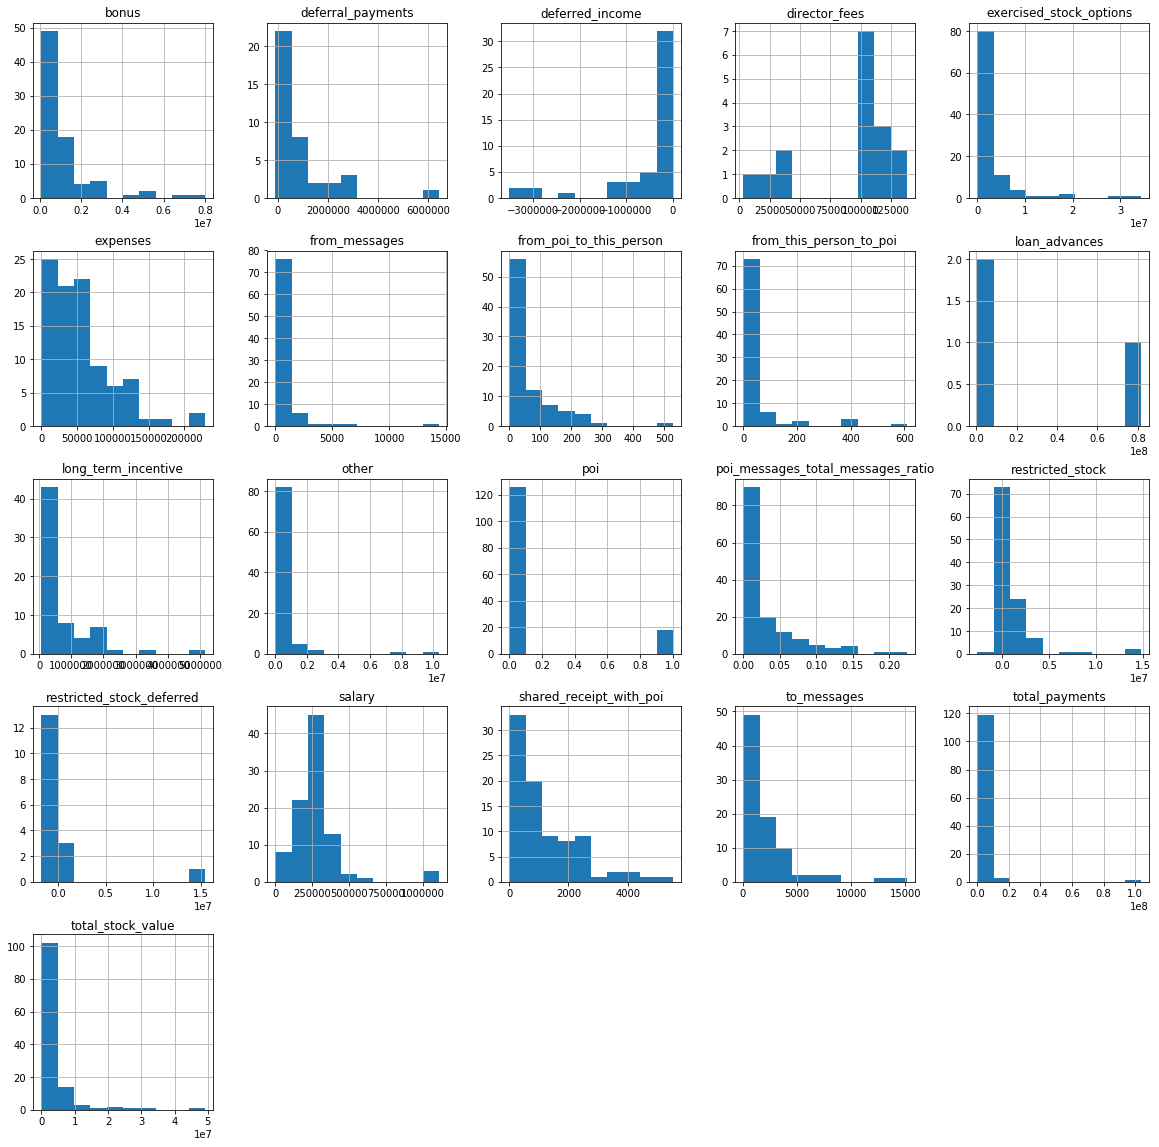

In [22]:
%matplotlib inline
df.hist(figsize=(20,20))

From the histograms of each column we can see that most of the features are heavily skewed. So if we are going to replace the NaN values in each column, to replace with median value would be better than replacing with mean. 